<a href="https://colab.research.google.com/github/iuryrosal/data-science/blob/master/exemplo_crossvalidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import sklearn

In [ ]:
file = pd.read_csv('houses_to_rent_v2.csv', encoding='latin1', decimal=',', sep=',')
file

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,SÃ£o Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,SÃ£o Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,SÃ£o Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,SÃ£o Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [ ]:
file_clean = file.drop(columns=['city', 'animal', 'furniture', 'hoa (R$)', 'property tax (R$)', 'rent amount (R$)', 'fire insurance (R$)'])

In [ ]:
file_clean

,area,rooms,bathroom,parking spaces,floor,total (R$)
0,70,2,1,1,7,5618
1,320,4,4,0,20,7973
2,80,1,1,1,6,3841
3,51,2,1,0,2,1421
4,25,1,1,0,1,836
...,...,...,...,...,...,...
10687,63,2,1,1,5,1926
10688,285,4,4,4,17,19260
10689,70,3,3,0,8,7390
10690,120,2,2,2,8,14020


In [ ]:
file_clean.floor.value_counts()

-      2461
1      1081
2       985
3       931
4       748
5       600
6       539
7       497
8       490
9       369
10      357
11      303
12      257
13      200
14      170
15      147
16      109
17       96
18       75
19       53
20       44
21       42
23       25
25       25
22       24
26       20
24       19
27        8
28        6
29        5
32        2
301       1
35        1
51        1
46        1
Name: floor, dtype: int64

In [ ]:
file_clean.floor.replace({'-': 0}, inplace=True)

In [ ]:
file_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   area            10692 non-null  int64 
 1   rooms           10692 non-null  int64 
 2   bathroom        10692 non-null  int64 
 3   parking spaces  10692 non-null  int64 
 4   floor           10692 non-null  object
 5   total (R$)      10692 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 501.3+ KB


In [ ]:
features = [i for i in file_clean.columns if i != 'total (R$)']
features

['area', 'rooms', 'bathroom', 'parking spaces', 'floor']

In [ ]:
x = file_clean[features].values
x

array([[70, 2, 1, 1, '7'],
       [320, 4, 4, 0, '20'],
       [80, 1, 1, 1, '6'],
       ...,
       [70, 3, 3, 0, '8'],
       [120, 2, 2, 2, '8'],
       [80, 2, 1, 0, 0]], dtype=object)

In [ ]:
y = file_clean['total (R$)'].values
y

array([ 5618,  7973,  3841, ...,  7390, 14020,  1587], dtype=int64)

In [ ]:
from sklearn.model_selection import train_test_split
predictors_train, predictors_test, class_train, class_test = train_test_split(x, y, test_size=0.25) #75% para treinamento e 25% para teste

In [ ]:
class_test.shape

(2673,)

In [ ]:
regressor = LinearRegression()

In [ ]:
regressor.fit(predictors_train, class_train)

LinearRegression()

In [ ]:
regressor.intercept_

315.805022844992

In [ ]:
regressor.coef_

array([ 9.87941457e-01, -6.77667092e+02,  2.86235186e+03, -5.30841677e+00,
        7.74588461e+01])

In [ ]:
previsoes = regressor.predict(predictors_test)
previsoes

array([4459.48823616, 4154.9612684 , 8378.20216939, ..., 4828.05736239,
       5210.44258877, 2520.24862088])

In [ ]:
class_test

array([ 4419,  3803, 10110, ...,  3000,  4149,  2555], dtype=int64)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mae = mean_absolute_error(previsoes, class_test)
mae

2441.259366263397

In [ ]:
previsoes.mean()

5631.625217631562

In [ ]:
class_test.mean()

5387.5742611298165

## Cross Validation

### Entendendo o K-folds

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
seed = 1234567
kf = KFold(n_splits=2, random_state=seed)
kf

KFold(n_splits=2, random_state=1234567, shuffle=False)

In [ ]:
i = 0
for train, test in kf.split(x):
    i = i + 1
    print(f'Separação {i}: \n Treino: {x[train]} \n\n Teste: {x[test]}\n')

Separação 1: 
 Treino: [[130 3 2 3 0]
 [49 1 1 1 '1']
 [28 1 1 0 '5']
 ...
 [70 3 3 0 '8']
 [120 2 2 2 '8']
 [80 2 1 0 0]] 

 Teste: [[70 2 1 1 '7']
 [320 4 4 0 '20']
 [80 1 1 1 '6']
 ...
 [380 4 1 0 0]
 [140 2 2 1 '2']
 [520 3 4 3 0]]

Separação 2: 
 Treino: [[70 2 1 1 '7']
 [320 4 4 0 '20']
 [80 1 1 1 '6']
 ...
 [380 4 1 0 0]
 [140 2 2 1 '2']
 [520 3 4 3 0]] 

 Teste: [[130 3 2 3 0]
 [49 1 1 1 '1']
 [28 1 1 0 '5']
 ...
 [70 3 3 0 '8']
 [120 2 2 2 '8']
 [80 2 1 0 0]]



In [ ]:
#https://scikit-learn.org/stable/modules/model_evaluation.html
scores = cross_val_score(regressor, x, y, cv=kf, scoring='neg_mean_absolute_error')
-scores

array([2510.48071157, 2512.40195219])

In [ ]:
-scores.mean()

2511.4413318789784

### Seleção de Features

- Objetivo: Verificar qual features resultam no melhor modelo

- Modelo anterior: features: [ 'area', 'rooms', 'bathroom', 'parking spaces', 'floor' ]
- MAE: 2511.4413318789784
- Testaremos o mesmo modelo, mas utilizando sem a variável floor

In [ ]:
features = [i for i in file_clean.columns if (i != 'total (R$)') & (i != 'floor')]
features

['area', 'rooms', 'bathroom', 'parking spaces']

In [ ]:
x = file_clean[features]

In [ ]:
scores = cross_val_score(regressor, x, y, cv=kf, scoring='neg_mean_absolute_error')
-scores

array([2579.14506302, 2565.49894155])

In [ ]:
-scores.mean()

2572.3220022847936

### Seleção de Modelo

- Objetivo: Verificar qual modelo possui os melhores resultados

In [ ]:
from sklearn.linear_model import LassoLars

In [ ]:
features = [i for i in file_clean.columns if i != 'total (R$)']
x = file_clean[features]

- Modelo de Regressão Linear com as mesmas features: MAE = 2511.4413318789784
- Testar com o modelo de Regressão Linear Lasso

In [ ]:
scores = cross_val_score(LassoLars(), x, y, cv=kf, scoring='neg_mean_absolute_error')
-scores

array([2496.5040381 , 2496.02174403])

In [ ]:
-scores.mean()

2496.262891064082

### Model Tuning

- Objetivo: Obter o parâmetro do modelo que possui o melhor resultado

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
x = iris.data
y = iris.target

In [ ]:
seed = 10000
kf = KFold(n_splits=2, random_state=seed)
kf

KFold(n_splits=2, random_state=10000, shuffle=False)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, x, y, cv=kf, scoring='accuracy')
scores

array([0.29333333, 0.33333333])

In [ ]:
scores.mean()

0.31333333333333335

In [ ]:
k_range = range(1, 20)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=kf, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.31999999999999995, 0.31999999999999995, 0.31333333333333335, 0.31333333333333335, 0.31333333333333335, 0.31333333333333335, 0.30666666666666664, 0.31999999999999995, 0.30666666666666664, 0.31333333333333335, 0.31333333333333335, 0.31333333333333335, 0.30666666666666664, 0.30666666666666664, 0.3, 0.30666666666666664, 0.30666666666666664, 0.30666666666666664, 0.3]


Para facilitar a avaliação, vamos construir um gráfico de linhas para melhorar a visualização dos valores de acurácia (k_scores)

In [ ]:
import matplotlib.pyplot as plt

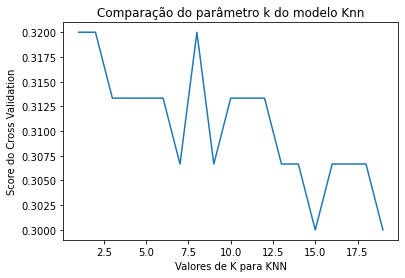

In [ ]:
plt.plot(k_range, k_scores)
plt.title("Comparação do parâmetro k do modelo Knn")
plt.xlabel('Valores de K para KNN')
plt.ylabel('Score do Cross Validation');

Pela visualização acima vemos os valores de K (número de vizinhos, parâmetro do KNN) em que a acurácia é maior, facilitando assim a tomada de decisão para escolha de valor deste parâmetro.